# [[데이콘] 영화 리뷰 감성 분석](https://dacon.io/competitions/official/235995/overview/description)

**참고 사이트**  
[【실습】 Python >> Text Mining -- 감성 분류 분석 (호텔 리뷰 데이터)](https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/)  
[[자연어 처리] konlpy 설치 오류, okt()에러-already loaded in](https://byeon-sg.tistory.com/entry/%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-konlpy-%EC%84%A4%EC%B9%98-%EC%98%A4%EB%A5%98-okt%EC%97%90%EB%9F%AC-already-loaded-in-another-classloader-SystemErro-1)  
[tqdm 사용법-python 진행률 프로세스바](https://skillmemory.tistory.com/entry/tqdm-%EC%82%AC%EC%9A%A9%EB%B2%95-python-%EC%A7%84%ED%96%89%EB%A5%A0-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EB%B0%94)  
[Scikit-Learn의 문서 전처리 기능](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)  
[감성 분석](https://datascienceschool.net/03%20machine%20learning/11.03%20%EA%B0%90%EC%84%B1%20%EB%B6%84%EC%84%9D.html)  
[classification_report로 평가 지표 확인하기
[출처] classification_report로 평가 지표 확인하기|작성자 6시 내 교양](https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # 코드 진행률 프로세스 바
import warnings
warnings.filterwarnings('ignore')

## 데이터 셋 불러오기

In [2]:
train = pd.read_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/train.csv')
train.head()

,id,document,label
0,1,아 더빙.. 진짜 짜증나네요 목소리,0
1,2,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,3,너무재밓었다그래서보는것을추천한다,0
3,4,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,5,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [3]:
# 결측치 확인
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [4]:
# 결측치 행 확인
train[train['document'].isnull()]

,id,document,label
25857,25858,NaN,1
55737,55738,NaN,1
110014,110015,NaN,0
126782,126783,NaN,0
140721,140722,NaN,0


In [5]:
# 결측치 행 제거
train.dropna(axis=0, inplace=True)

# 결측치 확인
train.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [6]:
len(train)

149995

## 텍스트 데이터 전처리

### 정규 표현식 적용

In [7]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangle = re.compile('[^ ㄱ-ㅣ 가-힣]') # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangle.sub("", text) # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [8]:
train['document_perprocess'] = train['document'].apply(apply_regular_expression)
train

,id,document,label,document_perprocess
0,1,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,2,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2,3,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다
3,4,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다평점 조정
4,5,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
...,...,...,...,...
149995,149996,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가
149996,149997,평점이 너무 낮아서...,1,평점이 너무 낮아서
149997,149998,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998,149999,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉방황과 우울했던 날들의 자화상


### ~~한글 맞춤법 검사~~
처리 시간 문제로 생략

In [64]:
# # !pip install py-hanspell
# from hanspell import spell_checker

# # 동작 테스트
# sent_test = "한글 맞춤법검사기 재대로작동돼는지테스트"
# spelled_sent_test = spell_checker.check(sent_test)
# checked_sent_test = spelled_sent_test.checked

# print("<맞춤법 검사 테스트 수행>")
# print("교정 前: ",sent_test)
# print("교정 後: ",checked_sent_test)

In [63]:
# for i in tqdm(range(len(train_data))):
#   try:
#     train_data_spell = spell_checker.check(train_data['document'][i]) # 교정할 맞춤법이 존재한다면 맞춤법 교정 수행
#     train_data['document'][i] = train_data_spell.checked
#   except: # 아니면 기존 데이터 유지
#     pass

### ~~한국어 형태소 분석~~

In [5]:
# !pip install konlpy
# from konlpy.tag import Okt
# from collections import Counter

In [66]:
# okt = Okt()  # 명사 형태소 추출 함수
# nouns = okt.nouns(apply_regular_expression(train_data['document'][0]))
# nouns

In [67]:
# 말뭉치 생성
# corpus = "".join(train_data['document'].tolist())
# corpus

In [68]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
# apply_regular_expression(corpus)
# nouns = okt.nouns(apply_regular_expression(corpus))
# print(nouns)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
# 빈도 탐색
# counter = Counter(nouns)

# 상위 빈도 10개 단어
# counter.most_common(10)

In [10]:
# 한 글자 명사 제거
# available_counter = []

# for i in range(len(nouns)):
#     if len(nouns[i]) > 1:
#         available_counter.append(nouns[i])

# 빈도 탐색        
# available_counter = Counter(available_counter)

# 한 글자 명사를 제거한 상위 빈도 10개 단어
# available_counter.most_common(10)

### 불용어 사전 
RANKS NL에 제공해주는 한국어 불용어 사전 활용

In [11]:
# stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]

In [13]:
# add_stopwords = ['구먼', '무재', '밓었', '해도', '그것', '볼때', '년대', '로만', '다지', '자꾸', '이기', '갈수록', '그냥', '절대', '나름',
#                '베트', '짤랐을꺼', '는걸', '다시', '한번', '아시', '뭥미', '지나', '또한', '지금', '다가']
# for word in add_stopwords:
#     stopwords.append(word)

### ~~Word Count~~  
#### ~~Bow 벡터 생성~~  
- ~~CountVectorizer는 띄어쓰기만을 기준으로 단어를 자른 후에 BoW를 만듦~~  
- ~~영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한글에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음~~  
- ~~예를 들어 "봄과"와 "봄이"를 다르게 인식하기 때문에 CountVectorizer 사용 전에 어간 추출을 해 "봄"으로 통일시켜 주는 것이 좋음~~  

RAM 용량 문제로 pass

In [14]:
# from sklearn.feature_extraction.text import CountVectorizer

# def text_cleaning(text):
#     hangle = re.compile('[^ ㄱ-ㅣ 가-힣]') # 정규 표현식 처리
#     result = hangle.sub("", text)
#     okt = Okt() # 형태소 추출
#     nouns = okt.nouns(result)
#     nouns = [x for x in nouns if len(x) > 1] # 한 글자 키워드 제거
#     nouns = [x for x in nouns if x not in stopwords] # 불용어 제거
#     return nouns
    
# vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x)) # CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만듦
# bow_vect = vect.fit_transform(train_data['document'].tolist()) # vect를 'document'(→ list)에 적용
# word_list = vect.get_feature_names() # 문서에 등장한 단어 리스트
# count_list = bow_vect.toarray().sum(axis=0) # 각 단어가 전체 리뷰 중에 등장한 총 횟수

In [15]:
# 각 단어의 리뷰별 등장 횟수
# bow_vect.toarray()

In [16]:
# bow_vect.toarray()을 실행할 때 행, 열 개수
# bow_vect.shape

In [17]:
# "단어" - "총 등장 횟수" Matching
# word_count_dict = dict(zip(word_list, count_list))
# word_count_dict

### ~~TF-IDF 적용~~
#### ~~TF-IDF 변환~~
~~Bag of Words 벡터에 대해서 TF-IDF 변환을 진행함~~

## 감성 분류

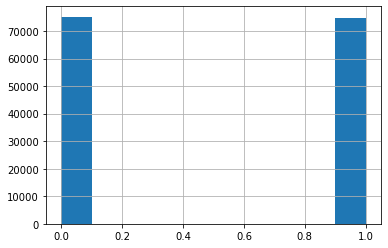

In [36]:
train['label'].hist();

In [37]:
train['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
# train 데이터를 train_data, val-data로 분류
data = train.drop(['id', 'document'], axis = 1).copy()
train_data, val_data = train_test_split(data, test_size=.3) # 7:3 비율로 분할
# train_data.reset_index(inplace=True)
# val_data.reset_index(inplace=True)

print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (104996, 2)
검증할 val 셋 :  (44999, 2)


In [29]:
val_data.head()

,label,document_perprocess
82383,1,재미있다 배우들 연기도 정말 잘하고 달달하고 맛있겠다 아메리칸 쉐프 보지는 않았지만...
67386,1,머야 이거 센과 치히로 보다 재밋네
26233,0,더럽게 잼없네 쓰레기ㅉㅉ 점준것중 한국영화는 점주는 창있네
118208,0,영화 시간에 이렇게 길다는걸 정말 간만에 느꼈음 ㅎㅎㅎ
90419,0,일점주기도아깝네도대체이런영화가왜나온건지나참미안하지만정말이영화는아닌것같네요


In [30]:
train_data.head()

,label,document_perprocess
48218,0,대 초반의 배우 초창기부터 요부의 정형화된 역할모델에서 벗어나지 못하는 모니카
86726,0,감상평 따의집어치우고 메탈리카와 함께 미쳐보자
133387,1,재미있어요 보세요
2238,1,자각과 깨달음의 무서움
25710,0,영화보고 돈아까운적 처음 이에요 진짜 보지마요


In [31]:
train_data_X = train_data.document_perprocess
train_data_y = train_data.label

val_data_X = val_data.document_perprocess
val_data_y = val_data.label

### model1 나이브 베이즈 모형

In [38]:
# 나이브 베이즈 모형으로 학습
model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB())
])

# %%time
model1.fit(train_data_X, train_data_y)

Pipeline(steps=[('vect', CountVectorizer()), ('mb', MultinomialNB())])

In [39]:
# 테스트 데이터 불러오기
test_data = pd.read_csv('data/[기업은행 혁신리그 사전강의] 영화 리뷰 감성 분석/test.csv')
test_data

X_test = test_data['document']

In [42]:
# classification_report을 이용한 성능 평가
# support: 각 라벨의 실제 샘플 개수
# macro avg: 각 클래스 별로 동일한 가중치 부여(샘플 개수의 불균형을 고려하지 않음) → 소수 클래스에 대한 성능이 낮을 때 더 큰 패널티 발생
# f1 macro avg = (0.81+0.08)/2 = 0.80
# weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균 계산(샘플 개수의 불균형 고려) → 샘플 개수가 적은 클래스의 영향력 감소
print('사용 모델: 나이브 베이즈 모델')
print(classification_report(val_data_y, model1.predict(val_data_X)))

사용 모델: 나이브 베이즈 모델
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     22495
           1       0.82      0.78      0.80     22504

    accuracy                           0.80     44999
   macro avg       0.80      0.80      0.80     44999
weighted avg       0.80      0.80      0.80     44999



### model2 logistic regression

In [50]:
model2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

# %%time
model2.fit(train_data_X, train_data_y)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', LogisticRegression())])

In [51]:
# classification_report을 이용한 성능 평가
print(classification_report(val_data_y, model2.predict(val_data_X)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80     22495
           1       0.82      0.75      0.78     22504

    accuracy                           0.79     44999
   macro avg       0.79      0.79      0.79     44999
weighted avg       0.79      0.79      0.79     44999



In [49]:
# 로지스틱 모형으로 학습
from sklearn.linear_model import LogisticRegression
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', LogisticRegression())
])

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['none', 'l2']}

gs = GridSearchCV(estimator = LogisticRegression(), cv= 5, param_grid=param_grid, n_jobs = -1)

result = gs.fit(train_data_X, train_data_y)

print('최적 파라미터: {}'.format(gs.best_params_)) # 최적의 파라미터 출력
print('최적 점수: {}'.format(gs.best_score_)) # 최적 파라미터의 평가 점수 출력
print(result.best_estimator_) # 최적 파라미터로 학습된 estimator 출력

ValueError: could not convert string to float: '대 초반의 배우 초창기부터 요부의 정형화된 역할모델에서 벗어나지 못하는 모니카'

In [38]:
# %%time
model2.fit(train_data_X, train_data_y)

Pipeline(steps=[('vect', CountVectorizer()), ('mb', MultinomialNB())])

In [41]:
# classification_report을 이용한 성능 평가
# support: 각 라벨의 실제 샘플 개수
# macro avg: 각 클래스 별로 동일한 가중치 부여(샘플 개수의 불균형을 고려하지 않음) → 소수 클래스에 대한 성능이 낮을 때 더 큰 패널티 발생
# f1 macro avg = (0.81+0.08)/2 = 0.80
# weighted avg: 각 클래스에 속하는 표본의 개수로 가중 평균 계산(샘플 개수의 불균형 고려) → 샘플 개수가 적은 클래스의 영향력 감소
print('사용 모델: 로지스틱 회귀분석')
print(classification_report(val_data_y, model1.predict(val_data_X)))

사용 모델: 로지스틱 회귀분석
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     22495
           1       0.82      0.78      0.80     22504

    accuracy                           0.80     44999
   macro avg       0.80      0.80      0.80     44999
weighted avg       0.80      0.80      0.80     44999

